# WeatherPy
----

### Analysis
* The temperature gets warmer as you approach the equator. A city at 67 degrees latitude is seeing temps as low as -46 degrees.
* There is no strong relationship between latitude and humidity. 
* There is no strong relationship between latitude and wind speed. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url =  f"{url}appid={api_key}&units={units}&q="

In [4]:
City = []
Cloudiness = []
Country = []
Date = []
Humidity= []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    try: 
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print ("Processing record for: " + city)
    except KeyError: 
        print("City not foud. Skipping....")     



Processing record for: ketchikan
Processing record for: koulikoro
Processing record for: georgetown
Processing record for: hermanus
City not foud. Skipping....
City not foud. Skipping....
Processing record for: busselton
Processing record for: punta arenas
Processing record for: puerto ayora
Processing record for: mataura
Processing record for: cape town
Processing record for: guerrero negro
Processing record for: golfito
Processing record for: butaritari
Processing record for: corlu
Processing record for: hithadhoo
Processing record for: praia da vitoria
City not foud. Skipping....
Processing record for: aksarka
Processing record for: rosarito
Processing record for: avarua
Processing record for: kisanga
Processing record for: nanortalik
City not foud. Skipping....
City not foud. Skipping....
Processing record for: nome
Processing record for: hilo
Processing record for: port elizabeth
Processing record for: albany
City not foud. Skipping....
Processing record for: vaini
Processing reco

Processing record for: erzin
Processing record for: kavaratti
Processing record for: miguel hidalgo
Processing record for: norman wells
Processing record for: bowen
Processing record for: whitehorse
City not foud. Skipping....
Processing record for: yeppoon
Processing record for: qasigiannguit
Processing record for: san quintin
Processing record for: zyryanka
Processing record for: puquio
Processing record for: maua
Processing record for: willowmore
Processing record for: upernavik
Processing record for: aksu
Processing record for: knysna
Processing record for: palencia
Processing record for: conakry
Processing record for: henties bay
Processing record for: cochrane
Processing record for: mahebourg
Processing record for: nemuro
City not foud. Skipping....
Processing record for: san jose iturbide
Processing record for: the valley
Processing record for: cleveland
Processing record for: riberalta
City not foud. Skipping....
Processing record for: warman
Processing record for: mangla
Proce

Processing record for: oil city
Processing record for: placido de castro
Processing record for: moerai
Processing record for: bom jesus
Processing record for: isangel
Processing record for: moctezuma
City not foud. Skipping....
Processing record for: estacion coahuila
Processing record for: niteroi
Processing record for: porto novo
Processing record for: bemidji
Processing record for: keshabpur
Processing record for: magdalena
Processing record for: farah
Processing record for: lorengau
Processing record for: cap-aux-meules
Processing record for: anshun
City not foud. Skipping....
Processing record for: pangnirtung
Processing record for: mastic beach
Processing record for: kibala
Processing record for: plavinas
Processing record for: jaffna
Processing record for: tarbes
Processing record for: kirkwall
Processing record for: lazaro cardenas
Processing record for: pokhara
Processing record for: mehamn
Processing record for: punta cardon
City not foud. Skipping....
City not foud. Skipping

In [5]:
city_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat" : Lat,
    "Lng" : Lng,
    "Max Temp" : Max_Temp,
    "Wind Speed" : Wind_Speed
}
city_data = pd.DataFrame(city_dict)

In [6]:
city_data.to_csv("Output/CityData.csv", index=False, header=True)

In [7]:
city_data.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [14]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ketchikan,1,US,1543881360,88,55.34,-131.65,35.06,5.82
1,Koulikoro,0,ML,1543881600,28,12.86,-7.56,73.40,6.93
2,Georgetown,40,GY,1543881600,88,6.80,-58.16,75.20,4.70
3,Hermanus,0,ZA,1543883230,95,-34.42,19.24,44.63,0.96
4,Busselton,32,AU,1543883231,100,-33.64,115.35,64.93,14.16


#### Latitude vs. Max Temperature Plot

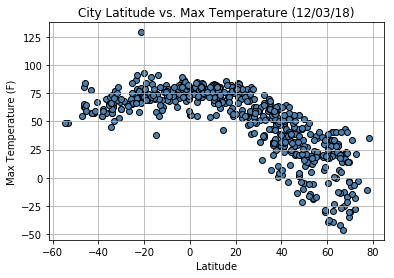

In [9]:
x_1 = city_data['Lat']
y_1 = city_data['Max Temp']
plt.scatter(x_1, y_1, marker="o", facecolors='steelblue', edgecolors="black")
plt.title("City Latitude vs. Max Temperature (12/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/LatvMaxTemp.png", bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

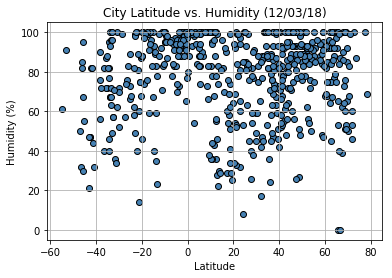

In [10]:
x_1 = city_data['Lat']
y_2 = city_data['Humidity']
plt.scatter(x_1, y_2, marker="o", facecolors='steelblue', edgecolors="black")
plt.title("City Latitude vs. Humidity (12/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/LatvHumidity.png", bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

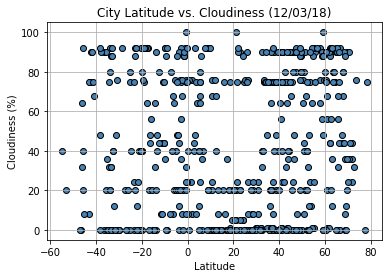

In [11]:
x_1 = city_data['Lat']
y_3 = city_data['Cloudiness']
plt.scatter(x_1, y_3, marker="o", facecolors='steelblue', edgecolors="black")
plt.title("City Latitude vs. Cloudiness (12/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/LatvCloudiness.png", bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

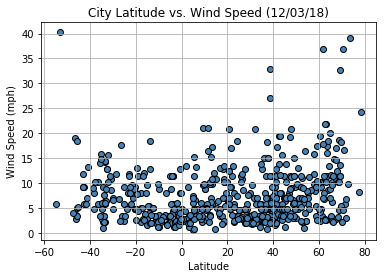

In [15]:
x_1 = city_data['Lat']
y_4 = city_data['Wind Speed']
plt.scatter(x_1, y_4, marker="o", facecolors='steelblue', edgecolors="black")
plt.title("City Latitude vs. Wind Speed (12/03/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/LatvWindSpeed.png", bbox_inches='tight')
plt.show()